# Jupyter Notebook to demonstrate the working of a LogisticRegression Classifier from the Scikit-learn Python library.

<b>Necessary libraries</b> <br>

<b>pandas</b> - Data preparation and exploratory analysis <br>
<b>numpy</b> - Numerical analysis <br>
<b>matplotlib and seaborn</b> - Data Visualization <br>
<b>sklearn </b>- Classification model building and prediction <br>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The datset is downloaded from UCI Machine learning repository.<br>

The datset is about directing marketing i.e phone calls from  banking institution. <br>

We will use this dataset to build a classification model for the banking insitution which will be able to predict whether the client will subscribe to a term deposit or not. <br>

We will make of the LogisticRegression classifier to build the model and preform the prediction


## Step 1: Data Preparation and EDA

In [121]:
dataset_url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
client_data = pd.read_csv(dataset_url)

Let's check the head and tail of the datset to make sure we have the full dataframe

In [12]:
client_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [13]:
client_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [17]:
client_data.shape

(41188, 21)

The dataframe has <b>41188 Observations</b> and <b>21 Variables</b>

In [18]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

<b>Input variables:</b>
<br>
1 - <b>age </b> (numeric) <br>
2 - <b>job :</b> type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - <b>marital :</b> marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - <b>education </b> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - <b>default: </b> has credit in default? (categorical: 'no','yes','unknown')<br>
6 - <b>housing: </b> has housing loan? (categorical: 'no','yes','unknown')<br>
7 - <b>loan: </b> has personal loan? (categorical: 'no','yes','unknown')<br>
<br>
related with the last contact of the current campaign:<br>
8 - <b>contact: </b> contact communication type (categorical: 'cellular','telephone') <br>
9 - <b>month: </b> last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - <b>day_of_week: </b> last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - <b>duration: </b>last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
<br>
other attributes: <br>
12 - <b>campaign: </b>number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - <b>pdays: </b>number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - <b>previous: </b>number of contacts performed before this campaign and for this client (numeric)<br>
15 - <b>poutcome: </b>outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
<br>
social and economic context attributes: <br>
16 - <b>emp.var.rate: </b> employment variation rate - quarterly indicator (numeric)<br>
17 - <b>cons.price.idx: </b>consumer price index - monthly indicator (numeric)<br>
18 - <b>cons.conf.idx: </b>consumer confidence index - monthly indicator (numeric)<br>
19 - <b>euribor3m: </b>euribor 3 month rate - daily indicator (numeric)<br>
20 - <b>nr.employed: </b>number of employees - quarterly indicator (numeric)<br>

<br>
<b>Output variable:</b>
21 - <b>y</b> - has the client subscribed a term deposit? (binary: 'yes','no')<br>

In [28]:
client_data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Check for missing values in the variables

In [29]:
client_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [32]:
client_data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [36]:
client_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

There are <b>36548 No's</b> and <b>4640 Yes's</b> in <b>y</b>

In [64]:
client_data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


<ul>
<li> Average age of customers who bought the term deposit is higher the customers who did not buy the term deposit</li>
<li> Campaigns are lower for the customers who bought it </li>
<li> pdays is more for customers who did not buy the term deposit</li>
</ul>

In [69]:
client_data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


## Step 2: Data Visualization

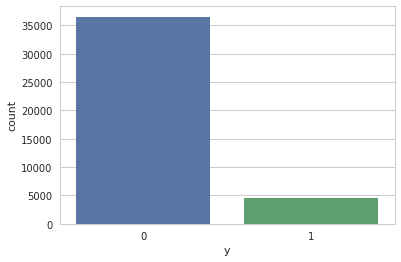

In [115]:
sns.countplot(x = 'y', data = client_data)
plt.show()


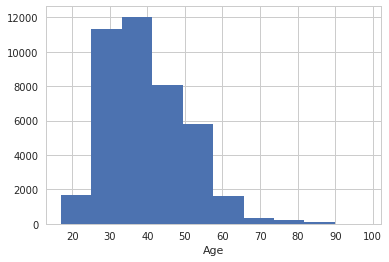

In [116]:
client_data['age'].hist()
plt.xlabel('Age')
plt.show()

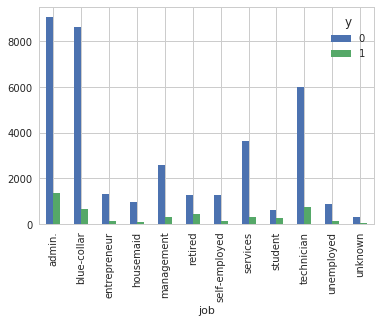

In [85]:
pd.crosstab(client_data['job'], client_data['y']).plot(kind = 'bar')
plt.show()

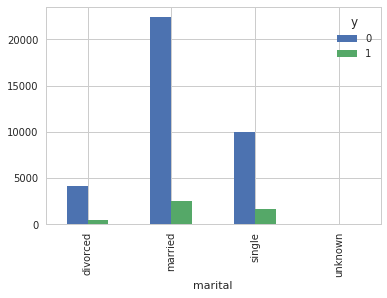

In [86]:
pd.crosstab(client_data['marital'], client_data['y']).plot(kind = 'bar')
plt.show()

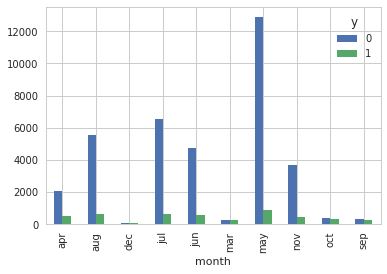

In [90]:
pd.crosstab(client_data['month'], client_data['y']).plot(kind = 'bar')
plt.show()

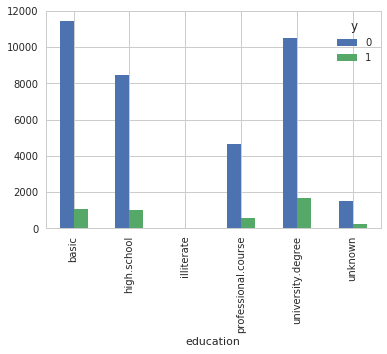

In [91]:
pd.crosstab(client_data['education'], client_data['y']).plot(kind = 'bar')
plt.show()

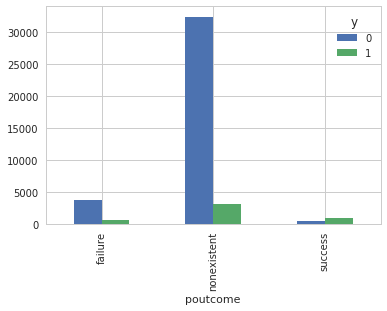

In [92]:
pd.crosstab(client_data['poutcome'], client_data['y']).plot(kind = 'bar')
plt.show()

## Step 3: Data Preparation

We will group basic.9y, basic.4y and basic.6y and create new column basic <br>
Create dummy variables for the categorical data

In [122]:
client_data['education'] = np.where(client_data['education'] == 'basic.9y', 'basic', client_data['education'])
client_data['education'] = np.where(client_data['education'] == 'basic.4y', 'basic', client_data['education'])
client_data['education'] = np.where(client_data['education'] == 'basic.6y', 'basic', client_data['education'])

In [124]:
client_data['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [125]:
client_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [198]:
dummy_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

data_new = client_data

for cat in dummy_columns:
    dummy_cols = pd.get_dummies(client_data[cat], prefix=cat, drop_first=True)
    data_new = data_new.join(dummy_cols)
       

In [200]:
data_vars = data_new.columns.values.tolist()
to_keep = [i for i in data_vars if i not in dummy_columns]
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [201]:
final_client_data = data_new[to_keep]
final_client_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Model Building

In [202]:
y = ['y']
X = [i for i in final_client_data.columns.values.tolist() if i not in y]

In [203]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [204]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(final_client_data[X], final_client_data[y], test_size=0.3, random_state=0)
logistic.fit(X_train, y_train)
#y_pred = logistic.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_test, y_test)))


/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy of logistic regression classifier on test set: 0.91


In [205]:
feature_sel_cols = RFE(logistic, 25)
feature_sel_cols = feature_sel_cols.fit(final_client_data[X], final_client_data[y])
print('Features sorted by their rank:')
sorted(zip(map(lambda X: round(X, 4), feature_sel_cols.ranking_), X))

/home/nikhil/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Features sorted by their rank:


[(1, 'contact_telephone'),
 (1, 'day_of_week_mon'),
 (1, 'day_of_week_thu'),
 (1, 'day_of_week_tue'),
 (1, 'day_of_week_wed'),
 (1, 'default_unknown'),
 (1, 'education_university.degree'),
 (1, 'education_unknown'),
 (1, 'euribor3m'),
 (1, 'job_blue-collar'),
 (1, 'job_entrepreneur'),
 (1, 'job_retired'),
 (1, 'job_self-employed'),
 (1, 'job_services'),
 (1, 'job_student'),
 (1, 'month_aug'),
 (1, 'month_dec'),
 (1, 'month_jul'),
 (1, 'month_jun'),
 (1, 'month_mar'),
 (1, 'month_may'),
 (1, 'month_nov'),
 (1, 'month_sep'),
 (1, 'poutcome_success'),
 (1, 'previous'),
 (2, 'campaign'),
 (3, 'marital_single'),
 (4, 'emp_var_rate'),
 (5, 'cons_conf_idx'),
 (6, 'loan_unknown'),
 (7, 'loan_yes'),
 (8, 'housing_yes'),
 (9, 'cons_price_idx'),
 (10, 'housing_unknown'),
 (11, 'education_professional.course'),
 (12, 'job_technician'),
 (13, 'nr_employed'),
 (14, 'job_unemployed'),
 (15, 'job_housemaid'),
 (16, 'duration'),
 (17, 'marital_married'),
 (18, 'month_oct'),
 (19, 'education_high.school

In [210]:
rfe_cols = ['contact_telephone', 'day_of_week_mon', 'day_of_week_tue', 'day_of_week_wed', 'day_of_week_thu', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_self-employed', 'job_retired', 'job_services', 'job_student', 'month_aug', 'month_dec', 'month_nov', 'month_jun', 'month_jul', 'month_mar', 'month_may', 'month_sep','poutcome_success', 'previous', 'campaign']

In [211]:
X = final_client_data[rfe_cols]
y = final_client_data['y']

In [212]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.898


In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10718   263]
 [  811   565]]


In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10981
          1       0.68      0.41      0.51      1376

avg / total       0.90      0.91      0.90     12357

